In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle_zillow as wr
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Iris Clustering Exercises

## 1. Clustering with the Iris Dataset
    - using the lesson as a guide, perform clustering on a dataset

### a. Choose features other than the ones used in the lesson.


In [2]:
iris = data('iris')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [4]:
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,sepal_width,petal_width
1,0.625000,0.041667
2,0.416667,0.041667
3,0.500000,0.041667
4,0.458333,0.041667
5,0.666667,0.041667


In [5]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

### b. Visualize results of clustering

In [7]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids = iris.groupby('cluster')['sepal_length','petal_length'].mean()

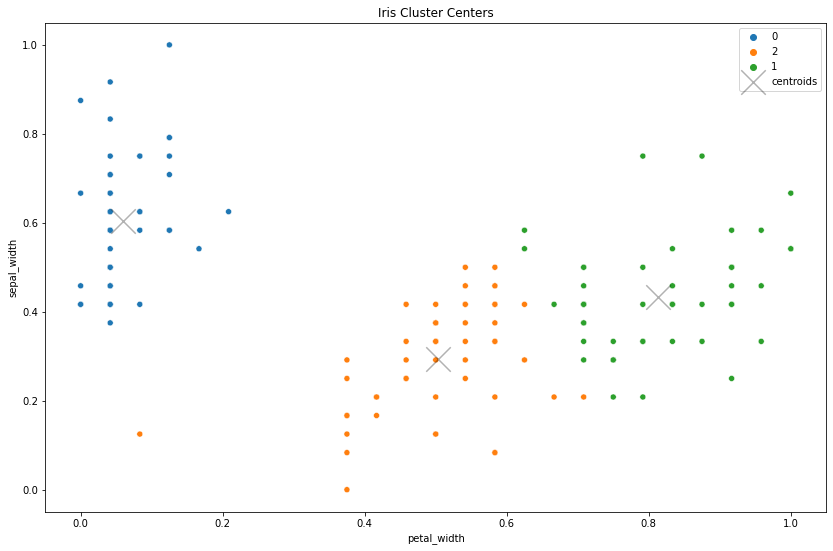

In [8]:
iris['cluster'] = iris['cluster'].astype('str')
X_scaled['cluster'] = X_scaled['cluster'].astype('str')
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Iris Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k 

In [9]:
k = 2
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

31.66489793111964

In [10]:
k = 3
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

3.576804853066748

In [11]:
k = 4
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.9012419226645307

In [12]:
k = 5
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.2557427596802517

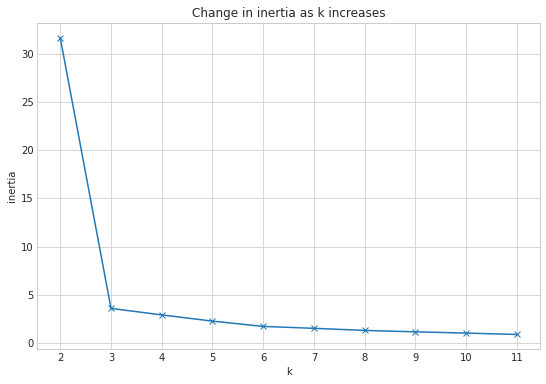

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

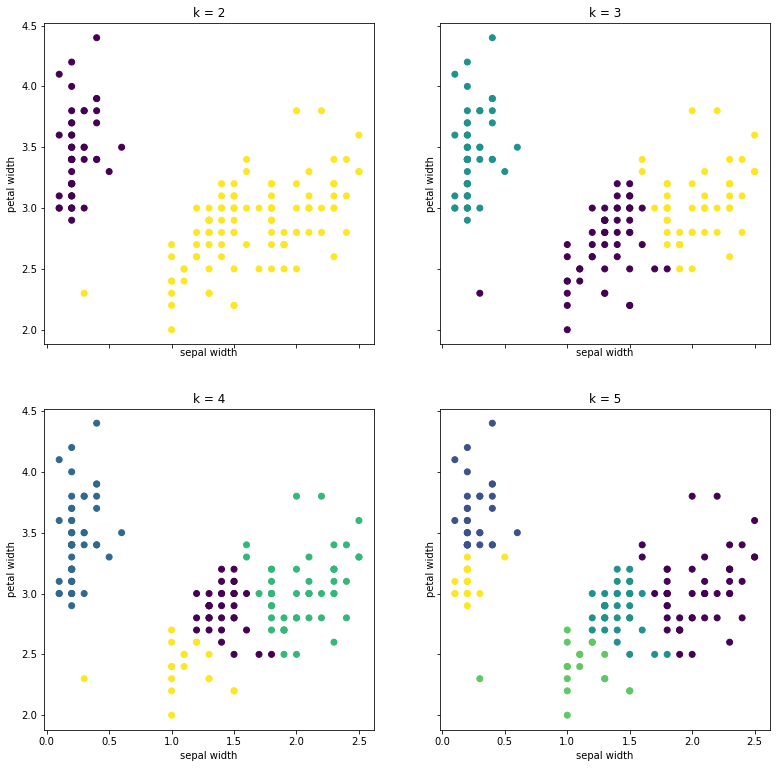

In [14]:
g, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.sepal_width,  c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

The rate of inertia change in the k means calculations suggests that k = 3 is the best to use. k = 2 has an extremely high residual, but risidual does not drastically change after k = 3. Visual analysis does show groups that make sense at k = 3 

### d. Repeat the clustering, this time with 3 different features

In [15]:
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,petal_area,sepal_area
1,5.1,3.5,1.4,0.2,setosa,0,0.28,17.85
2,4.9,3.0,1.4,0.2,setosa,0,0.28,14.70
3,4.7,3.2,1.3,0.2,setosa,0,0.26,15.04
4,4.6,3.1,1.5,0.2,setosa,0,0.30,14.26
5,5.0,3.6,1.4,0.2,setosa,0,0.28,18.00


In [16]:
X = iris[['petal_area','sepal_area','sepal_length']]

In [17]:
X.head()

,petal_area,sepal_area,sepal_length
1,0.28,17.85,5.1
2,0.28,14.70,4.9
3,0.26,15.04,4.7
4,0.30,14.26,4.6
5,0.28,18.00,5.0


In [18]:
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [19]:
X_scaled.head()

,petal_area,sepal_area,sepal_length
0,0.010787,0.392108,0.222222
1,0.010787,0.234765,0.166667
2,0.009518,0.251748,0.111111
3,0.012056,0.212787,0.083333
4,0.010787,0.399600,0.194444


In [20]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [21]:
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [22]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids = iris.groupby('cluster')['sepal_length','petal_length'].mean()

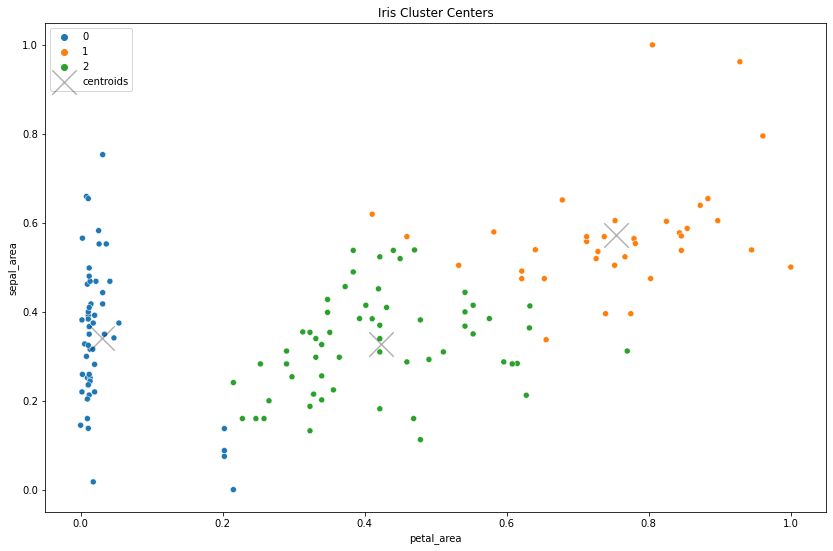

In [23]:
iris['cluster'] = iris['cluster'].astype('str')
X_scaled['cluster'] = X_scaled['cluster'].astype('str')
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'petal_area', y = 'sepal_area', data = X_scaled, hue = 'cluster')
centroids_scaled.plot.scatter(x = 'petal_area', y = 'sepal_area', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Iris Cluster Centers')
plt.legend();

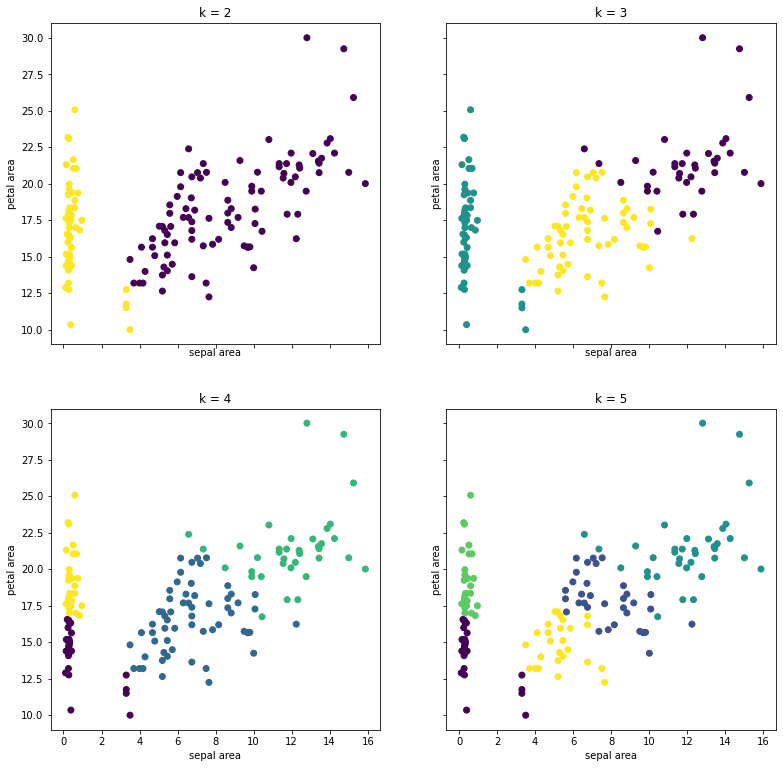

In [24]:
g, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_area, X.sepal_area,  c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal area', ylabel='petal area')

In [25]:
k = 3
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

6.065380031951015

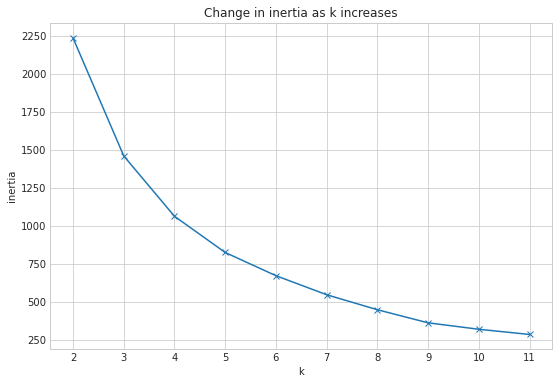

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [27]:
mall_df = wr.wrangle_mall()

In [28]:
mall_df = mall_df.drop(columns = ['customer_id'])

In [29]:
mall_df['male'] = pd.get_dummies(mall_df['gender'], drop_first=True)['Male']

In [30]:
X = mall_df[['annual_income','age', 'male']]

In [31]:
scaler = MinMaxScaler().fit(X[['annual_income','age']])
X_scaled = scaler.transform(X[['annual_income','age']])
X_scaled = pd.DataFrame(X_scaled)
X_scaled = X_scaled.rename(columns = {0:'annual_income', 1 :'age'})

In [32]:
X_scaled

,annual_income,age
0,0.000000,0.019231
1,0.000000,0.057692
2,0.008197,0.038462
3,0.008197,0.096154
4,0.016393,0.250000
...,...,...
195,0.860656,0.326923
196,0.909836,0.519231
197,0.909836,0.269231
198,1.000000,0.269231


In [33]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [42]:
mall_df['cluster'] = kmeans.predict(X_scaled)
X['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)


ValueError: Incorrect number of features. Got 3 features, expected 2.

In [43]:
X

,annual_income,age,male,cluster
0,15,19,1,0
1,15,21,1,0
2,16,20,0,0
3,16,23,0,0
4,17,31,0,0
...,...,...,...,...
195,120,35,0,1
196,126,45,0,1
197,126,32,1,1
198,137,32,1,1


In [41]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_)
centroids_scaled

,0,1
0,0.185505,0.148785
1,0.567947,0.310982
2,0.312699,0.717566


In [39]:
centroids = mall_df.groupby('cluster')['annual_income','age'].mean()

array([[0.18550475, 0.14878543],
       [0.56794651, 0.31098178],
       [0.3126988 , 0.71756602]])

In [ ]:
mall_df['cluster'] = iris['cluster'].astype('str')
X_scaled['cluster'] = X_scaled['cluster'].astype('str')
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'age', y = 'annual_income', data = X_scaled, hue = 'cluster')
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Mall Cluster Centers')
plt.legend();

In [ ]:
g, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income,  c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

In [ ]:
X

In [ ]:
X = iris[['petal_area','sepal_area','sepal_length']]

In [ ]:
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X_scaled)
scale_pred = kmeans.predict(X_scaled)
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X)
pred = kmeans.predict(X)

In [ ]:
centroids = iris.groupby('cluster')['sepal_area','petal_area'].mean()

In [ ]:
X['cluster'] = pred.astype('str')
X_scaled['cluster'] = scale_pred.astype('str')

In [ ]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'petal_area', y = 'sepal_area', data = X_scaled, hue = 'cluster')
centroids_scaled.plot.scatter(x = 'petal_area', y = 'sepal_area', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Iris Cluster Centers')
plt.legend();

In [ ]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'petal_area', y = 'sepal_area', data = X, hue = 'cluster')
centroids.plot.scatter(x = 'petal_area', y = 'sepal_area', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Iris Cluster Centers')
plt.legend();

In [ ]:
centroids

In [ ]:
centroids_scaled